# Matrix Operations

Matrices are a basic method of storing data in scientific computing. Numerous libraries already exist to do a variety of specialized matrix operations (see [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms)). Here, we will investigate a few operations on matrices.

## Matrix Multiplication

Beyond simply adding and subtracting matrices, [Matrix Multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication#General_definition_of_the_matrix_product) is a fundemental operation. In Python, Numpy already offers a means of multiplying matrices using the [`dot`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html) operation.

**Problem:** As a simple sanity check, write a method that does matrix multiplication,

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
 A = np.array([[1, 2],
               [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])
C = np.array([
    [A[0,0]*B[0,0] + A[0,1]*B[1,0]],
     [A[0,0]*B[0,1] + A[0,1]*B[1,1]],
    
    
])
D = []
for i in range(A.shape[0]):
    tmp = []
    for j in range(B.shape[1]):
        val = 0.0
        for k in range(A.shape[1]):
            val = val + A[i, k] * B[k, j]
        tmp.append(val)
    D.append(tmp)
print(A.dot(B))
print(np.array(D))

[[19 22]
 [43 50]]
[[19. 22.]
 [43. 50.]]


In [55]:
def matrix_multiplication(A, B):
    """
    A and B will be two dimensional matrices of shape (N, M) and (M, P) respectively
    You can index into them by doing A[i][j] or A[i, j] (because they will be numpy matrices)
    
    Return the product A.dot(B), but write your own code!
    """
    D = []
    for i in range(A.shape[0]):
        tmp = []
        for j in range(B.shape[1]):
            val = 0.0
            for k in range(A.shape[1]):
                val = val + A[i, k] * B[k, j]
            tmp.append(val)
        D.append(tmp)
    return np.array(D)

Test the code,

In [58]:
for i in range(10):
    (N, M, P) = np.random.randint(low=1, high=100, size=3)
    A, B = np.random.randn(N, M), np.random.randn(M, P)
    assert np.allclose(A.dot(B), matrix_multiplication(A, B))

## Unitary matrices

[Unitary matrices](https://en.wikipedia.org/wiki/Unitary_matrix) have a special property that if you multiply a matrix by it's transpose, then you get the identity matrix.

$$\begin{align}
A^T A = \mathbb{1}
\end{align}$$

for example, the following matrices are unitary (called the [SO(2) group](https://en.wikipedia.org/wiki/Orthogonal_group)),

In [5]:
def so2(phi):
    return np.array([[np.cos(phi), -np.sin(phi)],
                     [np.sin(phi),  np.cos(phi)]])

In [6]:
A = so2(1.234)
print(A)
print(A.T.dot(A))

[[ 0.33046511 -0.94381821]
 [ 0.94381821  0.33046511]]
[[ 1.  0.]
 [ 0.  1.]]


**Problem:** Prove analytically, that $ A^T A = \mathbb{1} $ for all $ \phi $,

$$\begin{align}
A = \left(\begin{matrix}
\cos \phi & -\sin \phi \\
\sin \phi & \cos \phi
\end{matrix}\right)
\end{align}$$

*Write proof here*

**Problem:** For a set of 2D points $ X $, we can graphically see what the SO(2) matrix does to the points. Play with $ phi $ till you can figure out what the matrix is doing.

In [7]:
X = np.random.randn(2, 3)

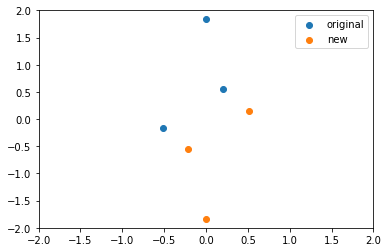

In [8]:
phi = np.pi
plt.scatter(X[0, :], X[1, :])
Y = so2(phi).dot(X)
plt.scatter(Y[0, :], Y[1, :])

plt.legend(['original', 'new'])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

The norm of a vector $ x $ can be computed like $ \| x \|^2 = x^T x $.

**Problem:** For any unitary matrix $ U $ (meaning $ U^T U = \mathbb{1} $), show that $ \| U x \| = \| x \| $. *Hint, $ (Ax)^T = x^T A^T $*.

## Eigenvalues

For a matrix $ A $, for certain vectors, we can get a relation,

$$\begin{align}
A \vec{x} = \lambda \vec{x}
\end{align}$$
where $ x $ is called an eigenvector and $ \lambda $ is called an eigenvalue.

This yields some cool properties like taking the power of a matrix,
$$\begin{align}
A^n \vec{x} = \lambda^n \vec{x}
\end{align}$$

**Problem:** Compute the eigenvalues using [numpy.linalg.eig](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.linalg.eig.html) and show that the eigenvectors/eigenvalues indeed satisfy the [eigenvalue equation](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors).

In [10]:
A = np.array([[2, 3, 4],
              [3, 0, 1],
              [4, 1, 1]])